In [4]:
# Install KaggleHub with pandas support
!pip install kagglehub[pandas-datasets] --quiet

In [5]:
import pandas as pd
import kagglehub
from kagglehub import KaggleDatasetAdapter
import matplotlib.pyplot as plt
import seaborn as sns

# Set the path to the specific file inside the dataset
file_path = "WA_Fn-UseC_-Telco-Customer-Churn.csv"

# Load the dataset using KaggleHub
df = kagglehub.load_dataset(
    KaggleDatasetAdapter.PANDAS,
    "blastchar/telco-customer-churn",
    file_path
)


<ipython-input-5-2fce481fb015>:11: DeprecationWarning: load_dataset is deprecated and will be removed in future version.
  df = kagglehub.load_dataset(


In [6]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# **Basic Data Exploration**

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


This data set contain 21 columns and 7043 row

In [8]:
df.isna().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


This dataset contain no missing value

In [10]:
df['MonthlyCharges'].describe()

,MonthlyCharges
count,7043.000000
mean,64.761692
std,30.090047
min,18.250000
25%,35.500000
50%,70.350000
75%,89.850000
max,118.750000


### 📊 MonthlyCharges Summary Conclusion

Most customers are charged between **\$35 and \$90** per month, with an average monthly charge of **\$64.76**.

The relatively high standard deviation (\$30) suggests considerable variation in pricing, likely due to differences in service plans or add-ons.

There are no extreme outliers, as values range from **\$18.25 to \$118.75**, which appears reasonable.

> This variation in charges could potentially be ...

# **Exploratory Data Analysis**

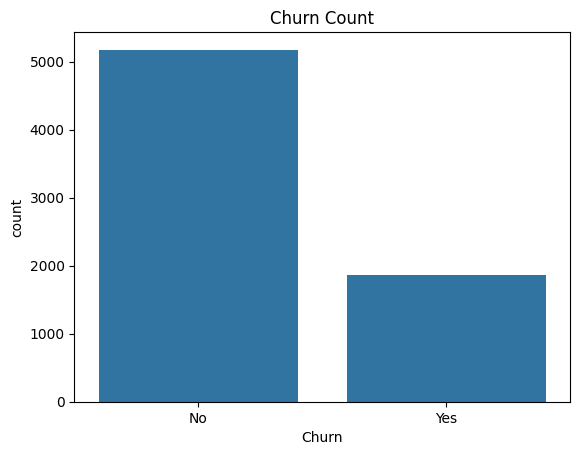

In [11]:
sns.countplot(x='Churn', data=df)
plt.title('Churn Count')
plt.show()



Most customers (around 5200) did not churn, while a significantly smaller number (around 1850) did.

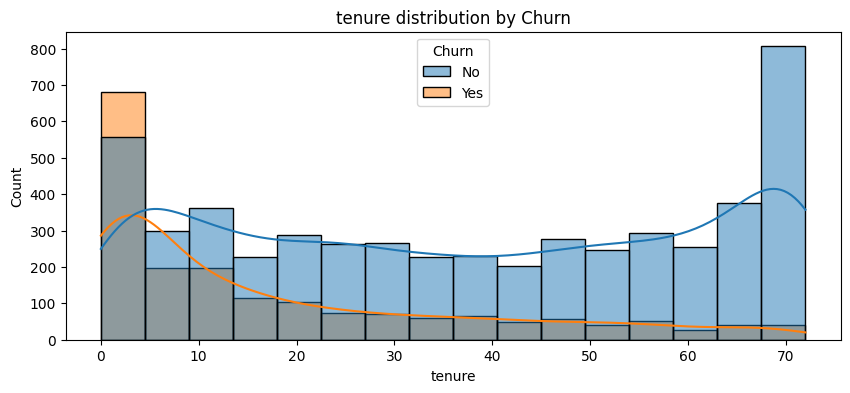

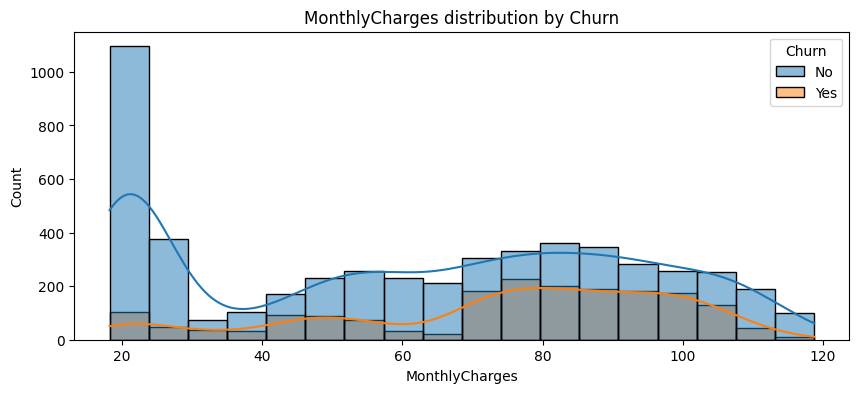

In [13]:
numerical_cols = ['tenure', 'MonthlyCharges']

for col in numerical_cols:
    plt.figure(figsize=(10,4))
    sns.histplot(data=df, x=col, hue='Churn', kde=True)
    plt.title(f'{col} distribution by Churn')
    plt.show()


- Customers with shorter tenures are significantly more likely to churn. As customer tenure increases, the likelihood of churn decreases considerably.
- Customers with higher monthly charges appear to have a higher propensity to churn.

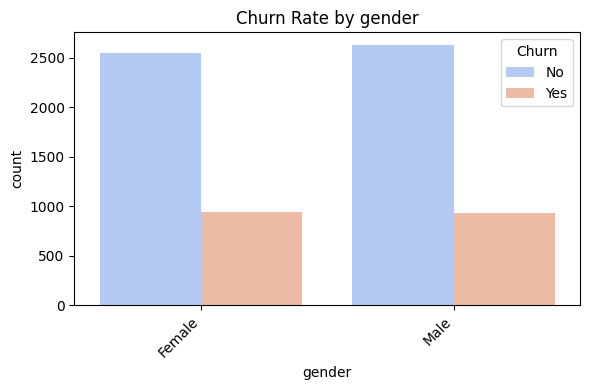

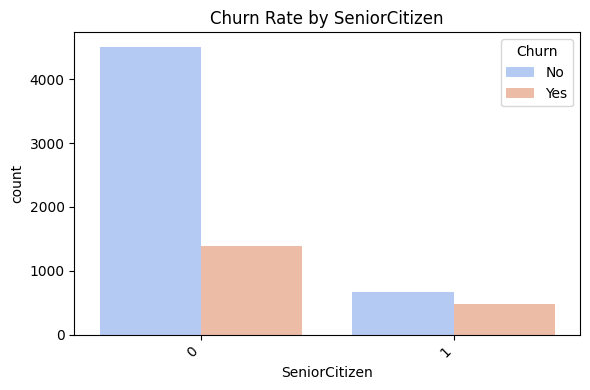

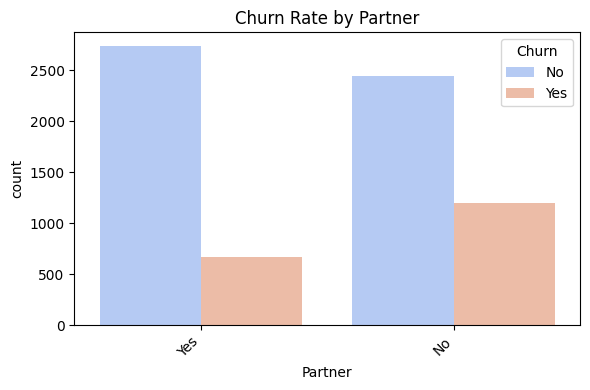

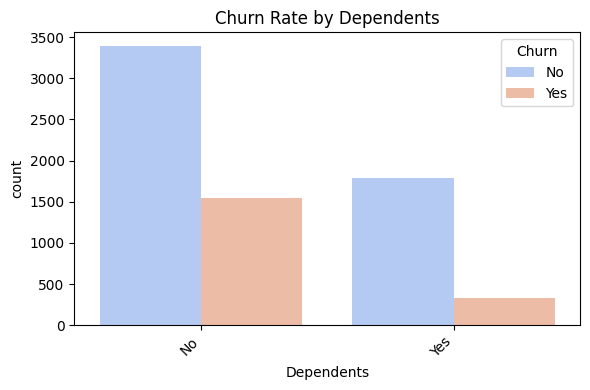

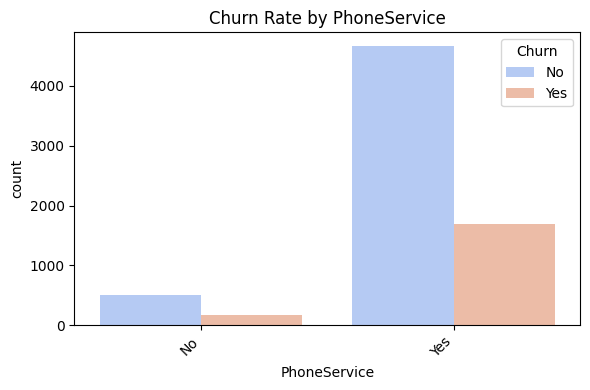

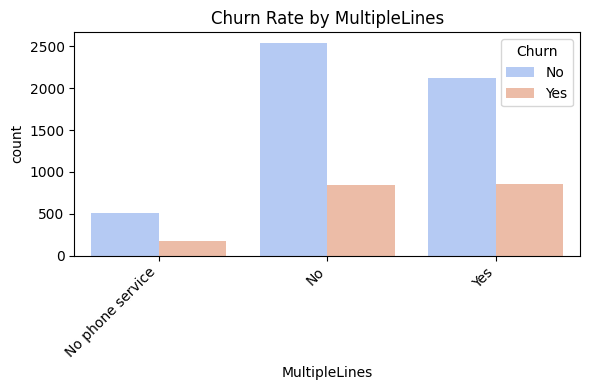

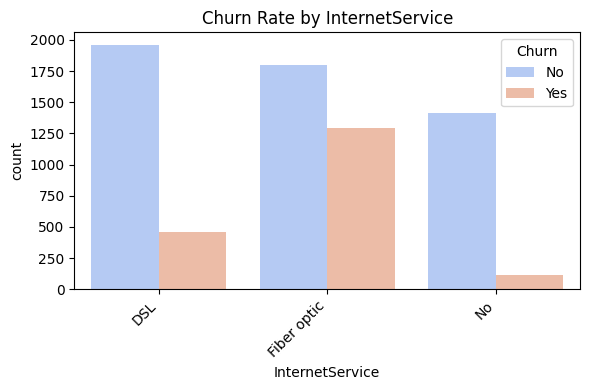

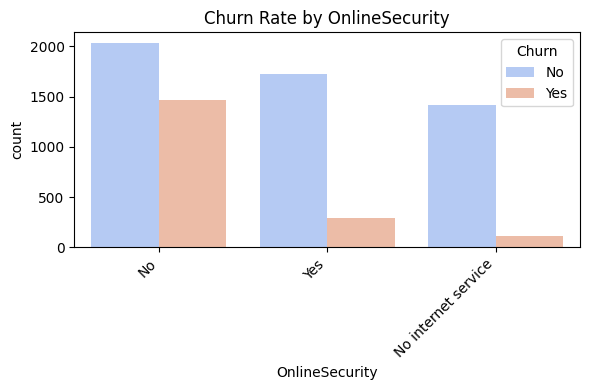

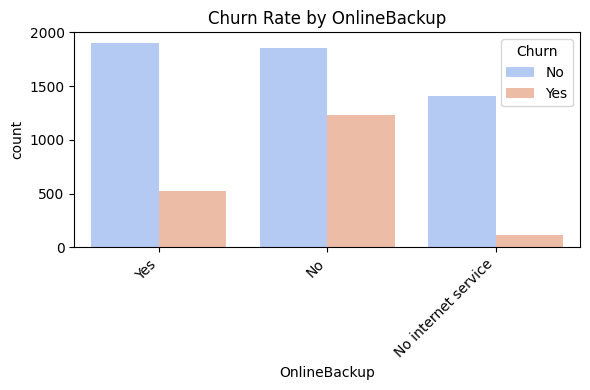

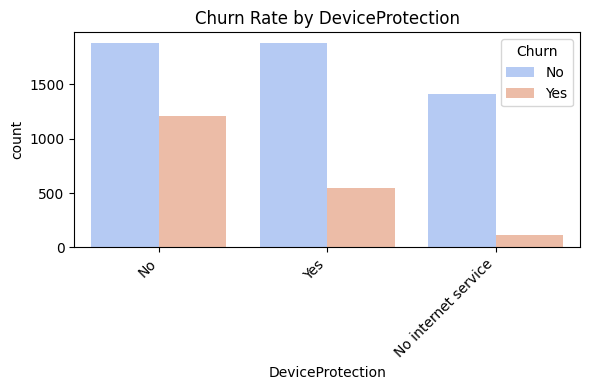

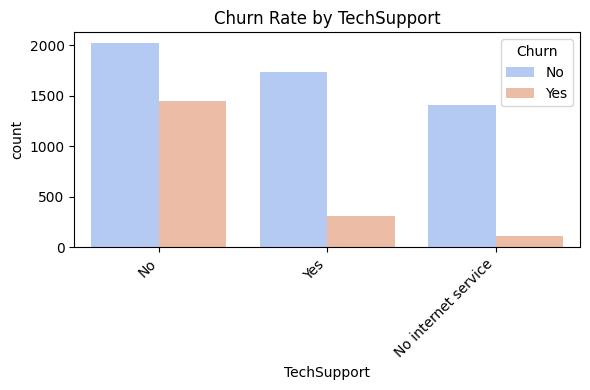

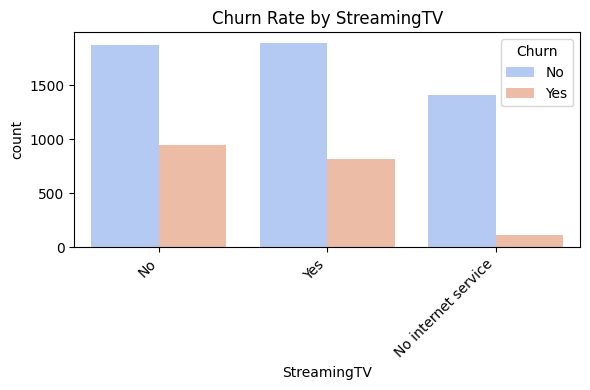

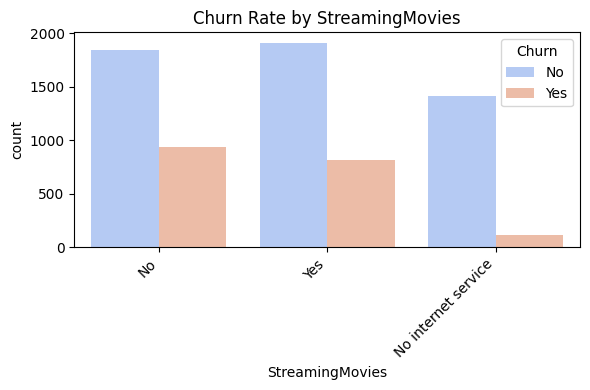

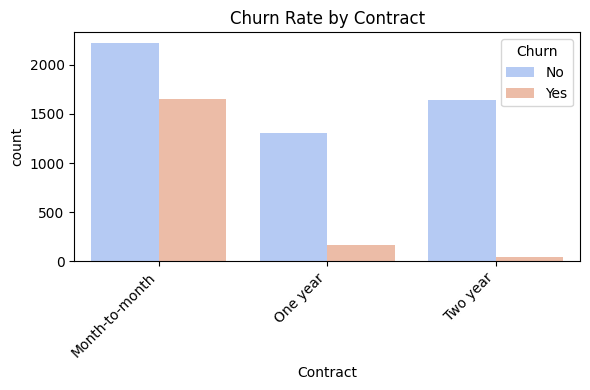

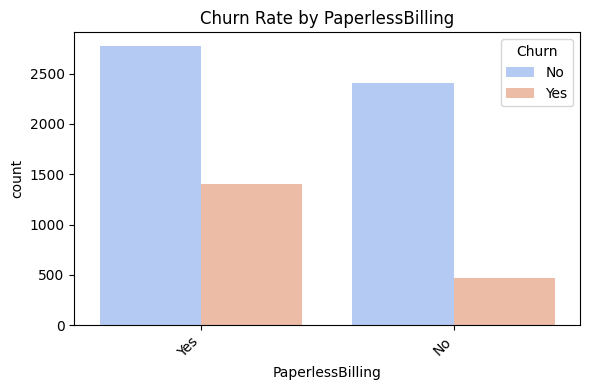

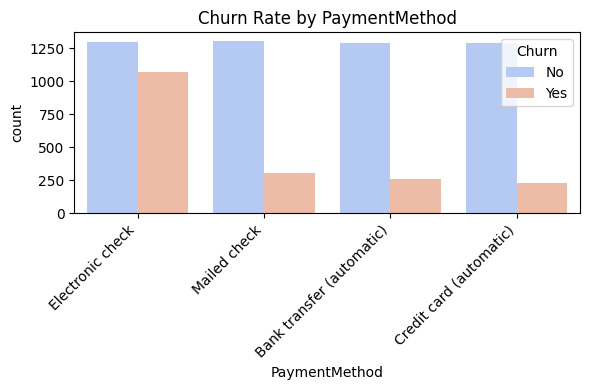

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd  # Assuming your data is in a pandas DataFrame

# Your DataFrame (replace with your actual data loading if needed)
# For example:
# df = pd.read_csv('your_data.csv')

# Define the function to plot churn rate by category
def plot_churn_rate_by_category(column):
    plt.figure(figsize=(6, 4))
    sns.countplot(x=column, hue='Churn', data=df, palette='coolwarm')
    plt.title(f'Churn Rate by {column}')
    plt.xticks(rotation=45, ha='right')  # Added ha='right' for better alignment
    plt.tight_layout()
    plt.show()

# Define the list of categorical columns to analyze
categorical_cols = [
    'gender', 'SeniorCitizen', 'Partner', 'Dependents',
    'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies',
    'Contract', 'PaperlessBilling', 'PaymentMethod'
]

# Loop through the categorical columns and plot the churn rate for each
for col in categorical_cols:
    plot_churn_rate_by_category(col)